<h1 align = "center"><b> What Kind of Freak Are You!?<b><h1>
<img src = "https://www.sideshowtoy.com/wp-content/uploads/2013/06/400101-product-feature.jpg" >

Hello everyone, you saw a monster and curious about this monster's kind? Then welcome to the "Freak Type Predictor". 
In this kernel we'll analyze some dead freak's bodies.

First thing first, let's import libraries.

In [7]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("darkgrid")
%matplotlib inline

Now we'll gel our dataset and start to analyze cadavers.

In [3]:
#reading dataset
dataset = pd.read_csv('D:\\data science\\JupyterProjects\\WhatKindOfFreakAreYou\\train.csv', index_col='id', sep=';')

In [4]:
#Data Analysis

let's see what we've got here

In [5]:
dataset.describe(include = 'all')

,bone_length,rotting_flesh,hair_length,has_soul,color,type
count,371.000000,371.000000,371.000000,371.000000,371,371
unique,NaN,NaN,NaN,NaN,6,3
top,NaN,NaN,NaN,NaN,white,Ghoul
freq,NaN,NaN,NaN,NaN,137,129
mean,0.434160,0.506848,0.529114,0.471392,NaN,NaN
std,0.132833,0.146358,0.169902,0.176129,NaN,NaN
min,0.061032,0.095687,0.134600,0.009402,NaN,NaN
25%,0.340006,0.414812,0.407428,0.348002,NaN,NaN
50%,0.434891,0.501552,0.538642,0.466372,NaN,NaN
75%,0.517223,0.603977,0.647244,0.600610,NaN,NaN


These createures have 6 color skins, very diverse.So, are there any correlations between these features? .

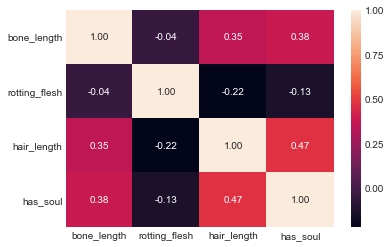

In [8]:
sns.heatmap(dataset.corr(), annot = True, fmt = ".2f")

hairlength-has_soul couple has the highest correlation with 0.47 and has_soul-bone_length couple are following them with 0.38 .
Alright, now we're going to seperate these "things" by their colors.

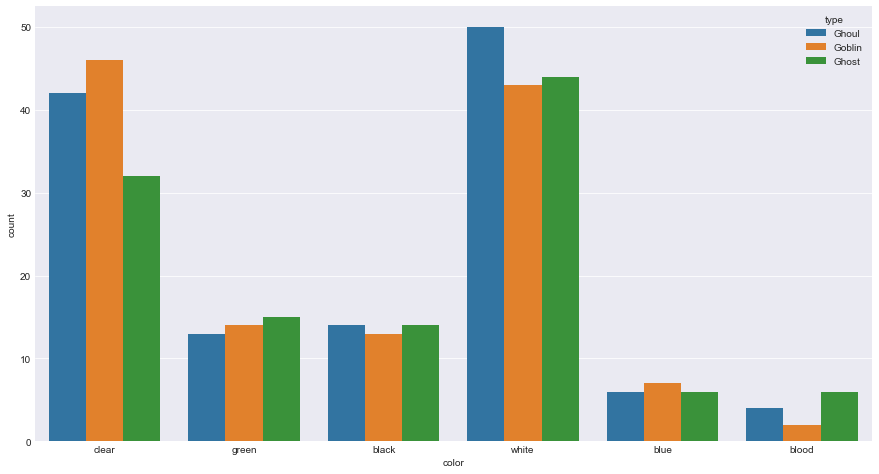

In [16]:
fig, ax = plt.subplots(figsize= (15, 8))
sns.countplot(x='color', hue='type', data=dataset, ax= ax)

Looks like they are spreading uniformly, but Ghouls have more white colors then others, that can be seen from first look.We can see this graphic with different type too :

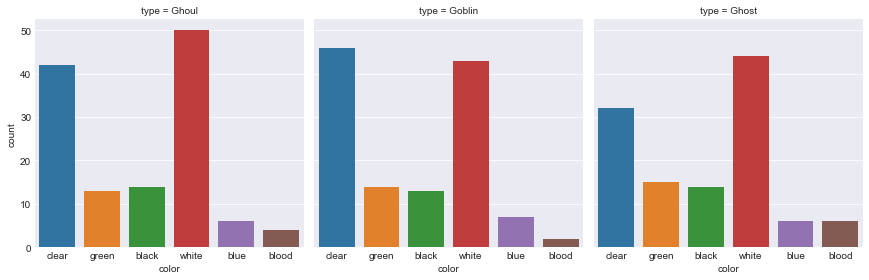

In [17]:
#g = sns.FacetGrid(data = dataset, col="type")
#g = g.map(plt.hist, "color", color="m")
g = sns.factorplot(x = "color", col="type", kind="count", data=dataset)

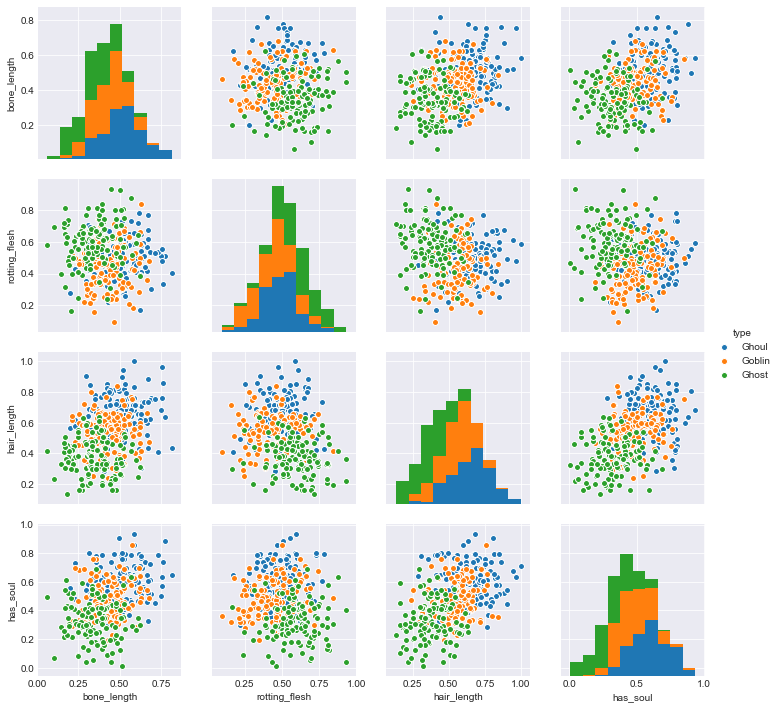

In [18]:
sns.pairplot(dataset, hue="type")

when we look at has_soul-hair_length plot, we can see that they look well-seperated, let's look closer.

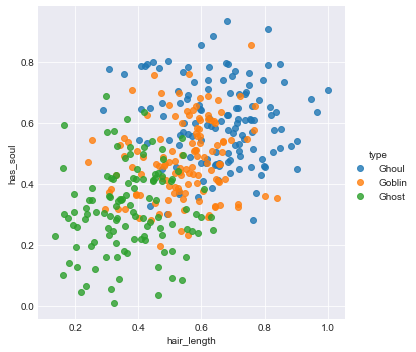

In [20]:
sns.lmplot(x = "hair_length", y = "has_soul", hue="type", data=dataset,
           fit_reg=False)

looks like Ghouls have more hair_length and soul_percent(I guess) than other, that's a good hint for you!

We can see these creatures' soul percents here too : 

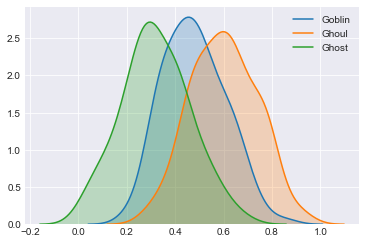

In [19]:
df_goblin = dataset[dataset['type'] == 'Goblin']
df_ghoul = dataset[dataset['type'] == 'Ghoul']
df_ghost = dataset[dataset['type'] == 'Ghost']

#PDF of types
ax = sns.kdeplot(df_goblin['has_soul'], shade=True, label = "Goblin")
ax = sns.kdeplot(df_ghoul['has_soul'], shade=True, label = "Ghoul")
ax = sns.kdeplot(df_ghost['has_soul'], shade=True, label = "Ghost")

Now, data Preprocessing time!

In [ ]:
#Data Preprocessing

In [44]:
X = dataset.iloc[:, :5].values
y = dataset.iloc[:, 5:].values

In [45]:
#Encoding Categorical Data(Independent)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_X = LabelEncoder()
X[:, 4] = LabelEncoder_X.fit_transform(X[:, 4])
OneHotEncoder_X = OneHotEncoder(categorical_features = [4])
X = OneHotEncoder_X.fit_transform(X).toarray()

#Encoding Categorical Data(Dependent)
LabelEncoder_y = LabelEncoder()
y = LabelEncoder_y.fit_transform(y)

#Drop one columns of X for dummy variable trap
X = X[:, 1:]

D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
#Splitting data to test and traning sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 0)

and now it's time for data modelling. We'll try different models: Logistic Regression, Kernel SVM, Random Forest Classifier and XGBoost. 

In [47]:
#Data Modelling 

In [48]:
#Applying Logistic Regression to training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression()
classifier_LR.fit(X_train, y_train)

#Predicting the test set results
y_pred = classifier_LR.predict(X_test)

#Getting accuracy score
from sklearn.metrics import accuracy_score
LR_Score = accuracy_score(y_test, y_pred)
print("Logistic Reg. Score: " + str(LR_Score))

Logistic Reg. Score: 0.6875


In [49]:
#applying kernel SVM to training set
from sklearn.svm import SVC
classifier_SVC = SVC(kernel = 'rbf', random_state = 0)
classifier_SVC.fit(X_train, y_train)

#Predicting the test set results
y_pred = classifier_SVC.predict(X_test)

#Getting accuracy score
SVM_Score = accuracy_score(y_test, y_pred)
print("Kernel SVM Score: " + str(SVM_Score))

Kernel SVM Score: 0.6875


In [50]:
#applying random forest to training set
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 100, criterion = "entropy",
                                       random_state = 0)
classifier_RF.fit(X_train, y_train)

#Predicting the test set results
y_pred = classifier_RF.predict(X_test)

#Getting accuracy score
RF_Score = accuracy_score(y_test, y_pred)
print("Random Forest Score : " + str(RF_Score))

Random Forest Score : 0.7410714285714286


In [51]:
#applying xgboost to training set
from xgboost import XGBClassifier
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, y_train)

#Predicting the test set results
y_pred = classifier_XGB.predict(X_test)

#Getting accuracy score
XG_Score = accuracy_score(y_test, y_pred)
print("XGBoost Score : " + str(XG_Score))

XGBoost Score : 0.7053571428571429


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Now we should compare this model's scores:

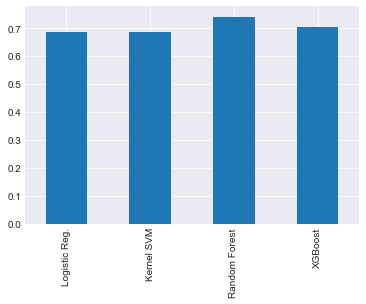

In [52]:
Scores_dict = {'Logistic Reg.': LR_Score, 'Kernel SVM': SVM_Score, 
               'Random Forest': RF_Score, 'XGBoost': XG_Score}
df_scores = pd.DataFrame.from_dict(data = Scores_dict, orient = "index")
df_scores.plot.bar(legend = False)

Random Forest is the winner!

In [53]:
importances = classifier_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier_RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 7 (0.304985)
2. feature 8 (0.277923)
3. feature 6 (0.188776)
4. feature 5 (0.171116)
5. feature 2 (0.017810)
6. feature 4 (0.017476)
7. feature 3 (0.010373)
8. feature 1 (0.007494)
9. feature 0 (0.004047)


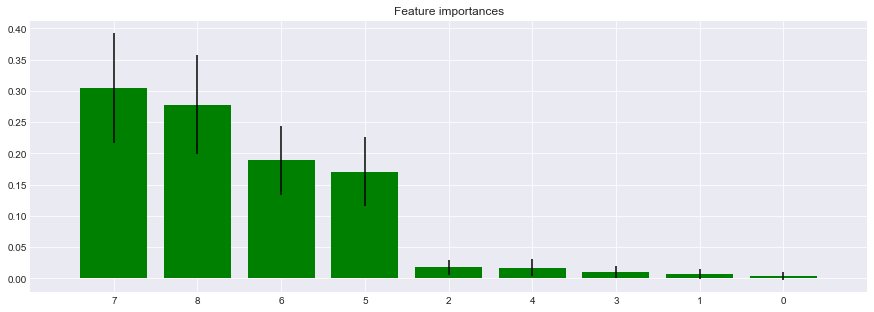

In [54]:
# Plot the feature importances of the forest
plt.figure(figsize = (15, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

if we look at feature's importances, we realize that colors don't have that much impact on accuracy, maybe we should try to drop these and try to predict again.

In [55]:
#dropping color columns
X_train = X_train[:, 5:]
X_test = X_test[:, 5:]

In [56]:
#fit again random forest
classifier_RF = RandomForestClassifier(n_estimators = 1000, criterion = "entropy",
                                       max_depth=7,random_state = 0)
classifier_RF.fit(X_train, y_train)
#Predicting the test set results
y_pred = classifier_RF.predict(X_test)
#Getting accuracy score
RF_Score = accuracy_score(y_test, y_pred)
print("accuracy score without color : " + str(RF_Score))

accuracy score without color : 0.7410714285714286


That didn't change anything actually, but now we have less feature.


Now, time to model selection, we have to make sure about our model's score is reliable.

In [59]:
#model selection

In [63]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_RF, X = X_train, y = y_train, cv = 10)
print("accurasies mean: " + str(accuracies.mean()))
print("accurasies std : " + str(accuracies.std()))

accurasies mean: 0.684497150997151
accurasies std : 0.1145058776299359


In [64]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators" : [1, 10, 100, 256, 512, 1024],
              "min_samples_leaf": [1,2,3,4,5],
              "min_samples_split" : [2,3,4,5],
              "max_depth" : [1, 2, 4, 8, 16]}
grid_search = GridSearchCV(estimator = classifier_RF, param_grid = parameters,
                           scoring = "accuracy", n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("best score : " + str(best_accuracy))
print("best parameters : " + str(best_parameters))

best score : 0.7181467181467182
best parameters : {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


that's for it for today everyone, thanks for reading. If you have any advice, feel free to comment.